In [1]:
setwd('../')

### Load libraries + Setup analysis for severe or nonsevere patients

In [2]:
##### Louvain for each layer

phenotype <- "notsevere" # "severe" for severe-only analysis, "notsevere" for not-severe patients.

destfile= "Plots/SupplementaryFigure_3" #Directory destination and name of the csv files that will be retrieved as output.


#libraries needed:
library("AnnotationDbi")
library("org.Hs.eg.db")
library("igraph")
library("gplots")
library('parallelDist')

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain 

In [3]:
patients2 <- read.table(file= "data/MolTi/Community_Analysis/originalSevereDiagnosis.csv",sep= ",",header= F)
patients2[,1] <- as.character(patients2[,1])
patients2[,2] <- as.character(patients2[,2])
patients2 <- cbind(patients2,0)
patients2[,3] <- sample(patients2[,2])
head(patients2)

V1,V2,0
NEW0920,severe,notsevere
NEW0919,severe,notsevere
NEW0918,severe,severe
NEW0922,severe,notsevere
NEW0909,severe,severe
NEW0908,severe,severe


### Retrieve specific Compound Heterozygous Mutations for Severe & Non-severe groups

In [4]:
patients <- read.table(file= "data/InputGenes/compound_all_nov2018.csv")

In [5]:
head(patients)

V1,V2
NEW0907,ACAD10
NEW0907,AHNAK2
NEW0907,BMS1
NEW0907,C16orf71
NEW0907,CCDC171
NEW0907,FBN2


In [6]:
patients[,1] <- as.character(patients[,1])
patients[,2] <- as.character(patients[,2])
patients <- split(patients[,2],patients[,1])
#severepatients <- patients[which(patients2[,3]=="severe")] #Uncomment and comment the next one for randomizing
severepatients <- patients[patients2[,1][which(patients2[,2]=="severe")]] ##Uncomment and comment the previous one for the original plot
#notseverepatients <- patients[which(patients2[,3]=="notsevere")] #Uncomment and comment the next one for randomizing
notseverepatients <- patients[patients2[,1][which(patients2[,2]=="notsevere")]] #Uncomment and comment the previous one for the original plot
severe<- unlist(severepatients)
names(severe) <- NULL
notsevere <- unlist(notseverepatients)
names(notsevere) <- NULL
severeonly <- setdiff(severe,notsevere)
notsevereonly <- setdiff(notsevere,severe)

severepatientsnames <- names(severepatients)
notseverepatientsnames <- names(notseverepatients)

In [7]:
head(patients)

$NEW0907
 [1] "ACAD10"       "AHNAK2"       "BMS1"         "C16orf71"     "CCDC171"     
 [6] "FBN2"         "FLG"          "Gene(Refseq)" "HLA-A"        "HYDIN"       
[11] "HYI"          "ITIH5"        "KIAA1919"     "LAMA5"        "MAP1A"       
[16] "MROH5"        "NOL8"         "PALD1"        "PMS2"         "RP1L1"       
[21] "SFI1"         "SLCO4A1"      "TCTE3"        "TLL2"         "TLR6"        
[26] "TMTC1"        "TTC3"         "ZNF469"      

$NEW0908
 [1] "AHNAK2"       "BAHCC1"       "BAIAP3"       "C2CD3"        "CFB"         
 [6] "COL15A1"      "FHAD1"        "FMN1"         "Gene(Refseq)" "HEATR1"      
[11] "LAMA2"        "MUC3A"        "MUC4"         "OR10G9"       "TDRD6"       
[16] "ZAN"         

$NEW0909
 [1] "AHNAK2"       "ANKRD12"      "CDH23"        "CES5A"        "CHGB"        
 [6] "ETV3L"        "FGL1"         "Gene(Refseq)" "GRIN3B"       "MCM8"        
[11] "MROH7"        "MYBPC2"       "MYH15"        "PLB1"         "SELO"        
[16] "TIAM1"        "TTN"          "ZNF273"      

$NEW0918
 [1] "C1orf94"      "CASP5"        "DMXL2"        "FHOD3"        "Gene(Refseq)"
 [6] "HSPG2"        "KIAA1109"     "LILRA1"       "LOXL3"        "LRP2"        
[11] "MUC17"        "MUC19"        "MUC3A"        "NAT8B"        "NOTCH4"      
[16] "SMTN"         "SRMS"         "UNC13C"       "ZP4"         

$NEW0919
 [1] "AHNAK2"       "BAHCC1"       "CRELD1"       "DNAH2"        "DNAH7"       
 [6] "FHOD3"        "Gene(Refseq)" "HSPG2"        "LEFTY2"       "MUC17"       
[11] "MUC19"        "NCKAP5L"      "NLRC5"        "NOTCH4"       "PRRT3"       
[16] "PTPN14"       "SMTN"         "SRMS"         "TOR2A"       

$NEW0920
 [1] "AGRN"         "AHNAK2"       "ANKRD18A"     "C1GALT1C1L"   "DIP2A"       
 [6] "DNAH2"        "ETV3L"        "FAM205A"      "FMN1"         "Gene(Refseq)"
[11] "KIF13B"       "KRT79"        "MICALL2"      "MUC5B"        "NKPD1"       
[16] "NPHP3"        "OBSCN"        "RAD51AP1"     "RP1"          "SLFN13"      
[21] "SNAP47"

### Retrieve specific Copy Number Variations for Severe & Non-severe groups

In [8]:
cnvdata <- read.csv("data/InputGenes/CNV_genes_for_iker.tsv",sep= "\t")
cnvdata[,"gene"] <- as.character(cnvdata[,"gene"])
genis <- c(cnvdata["gene"])$gene
genis <- mapIds(org.Hs.eg.db,keys = genis,column = "SYMBOL",keytype="ENSEMBL",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
# Manual mapping for missing IDs
genis["ENSG00000005955"] <- "GGNBP2" 
genis["ENSG00000006114"] <- "SYNGR"
genis["ENSG00000108264"] <- "TADA2A"
genis["ENSG00000108270"] <- "AATF"
genis["ENSG00000108272"] <- "DHRS11"
genis["ENSG00000108278"] <- "ZNHI3"
genis["ENSG00000108753"] <- "HNF1B"
genis["ENSG00000129282"] <- "MRM1"
genis["ENSG00000132130"] <- "LHX1"
genis["ENSG00000141140"] <- "MYO19"
genis["ENSG00000141141"] <- "DDX52"
genis["ENSG00000161326"] <- "DUSP14"
genis["ENSG00000167230"] <- "C17orf78"
genis["ENSG00000174093"] <- "RP11-1407O15.2"
genis["ENSG00000184886"] <- "PIGW"
genis["ENSG00000197681"] <- "TBC1D3"
genis["ENSG00000203815"] <- "FAM231D"
genis["ENSG00000219492"] <- "RP11-1396O31.13"
genis["ENSG00000229924"] <- "FAM90A26"
genis["ENSG00000250913"] <- "USP17L23"
genis["ENSG00000268172"] <- "AL590452.1"
genis <- as.matrix(genis)
rownames(genis) <- NULL
genis <- genis[,1]
cnvdata <- cbind(cnvdata,genis)
severedata <- cnvdata[,c("gene","whole_gene",severepatientsnames,"genis")]
milddata <- cnvdata[,c("gene","whole_gene",notseverepatientsnames,"genis")]

'select()' returned 1:many mapping between keys and columns


In [9]:
severedata <- severedata[apply(X = severedata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(severedata)

,gene,whole_gene,NEW0920,NEW0919,NEW0918,NEW0922,NEW0909,NEW0908,NEW0936,NEW0935,genis
4,ENSG00000042781,FALSE,2,2,2,2,2,2,1,2,USH2A
5,ENSG00000072401,FALSE,2,2,2,2,2,2,1,2,UBE2D1
7,ENSG00000100033,TRUE,2,2,2,2,2,2,2,3,PRODH
9,ENSG00000107018,TRUE,2,3,2,2,2,2,2,2,RLN1
26,ENSG00000151033,FALSE,1,2,2,2,2,2,2,2,LYZL2
28,ENSG00000160072,FALSE,2,1,1,2,2,2,2,2,ATAD3B


In [10]:
milddata <- milddata[apply(X = milddata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(milddata)

,gene,whole_gene,NEW0921,NEW0931,NEW0907,NEW0923,NEW0930,NEW0929,NEW0928,NEW0927,NEW0932,NEW0934,NEW0933,NEW0937,genis
1,ENSG00000005955,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,GGNBP2
2,ENSG00000006114,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,SYNGR
3,ENSG00000038945,FALSE,2,1,2,2,2,2,2,2,2,2,2,2,MSR1
6,ENSG00000090857,FALSE,1,2,2,2,2,2,2,2,2,2,2,2,PDPR
7,ENSG00000100033,TRUE,2,2,3,2,2,2,3,2,2,2,2,2,PRODH
8,ENSG00000100033,TRUE,2,2,2,2,4,2,2,2,2,2,2,2,PRODH


In [11]:
rownames(severedata) <- NULL
rownames(milddata) <- NULL
severecnvs <- unique(as.character(severedata[,"genis"]))
mildcnvs <- unique(as.character(milddata[,"genis"]))
cnvsevereonly <- setdiff(severecnvs,mildcnvs)
cnvsnotsevereonly <- setdiff(mildcnvs,severecnvs)

In [12]:
cnvsevereonly

[1] "USH2A"   "UBE2D1"  "ATAD3B"  "TPCN2"   "AKNAD1"  "CLCNKB"  "CASP12" 
 [8] "PSG5"    "ZNF705B" "DEFB115" "ATAD3C"

### Load CMS Causal genes

In [13]:
cosa <- read.csv("data/InputGenes/cmsgenes.csv",header=FALSE) #http://www.musclegenetable.fr/4DACTION/Blob_groupe2
#cosa <- read.csv("data/InputGenes/genespaper.csv",header=FALSE) #Table PMID:30552423
cosa <- cosa[,1]
cosa <- as.character(cosa)
cosa

[1] "AGRN"    "ALG14"   "ALG2"    "CHAT"    "CHRNA1"  "CHRNB1"  "CHRND"  
 [8] "CHRNE"   "CHRNG"   "COL13A1" "COLQ"    "DOK7"    "DPAGT1"  "GFPT1"  
[15] "GMPPB"   "LAMA5"   "LAMB2"   "LRP4"    "MUSK"    "MYO9A"   "PLEC"   
[22] "PREPL"   "RAPSN"   "RPH3A"   "SCN4A"   "SLC18A3" "SLC25A1" "SLC5A7" 
[29] "SNAP25"  "SYT2"    "UNC13B"  "VAMP1"

### Join causal and mutated genes

In [14]:
# Setup depending on severity groups
if(phenotype == "severe"){
  algenes <- c(severeonly,cosa,cnvsevereonly) #Severe-Only Analysis 
}
if(phenotype == "notsevere"){
  algenes <- c(notsevereonly,cosa,cnvsnotsevereonly) #To get a Mild-Only  Analysis
}

In [15]:
# Solve some missing gene mappings
if("KIAA1919" %in% algenes){
  algenes <- replace(algenes,algenes== "KIAA1919","MFSD4B")
}
if("FAM188B" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM188B","MINDY4")
}
if("C14orf159" %in% algenes){
  algenes <- replace(algenes,algenes== "C14orf159","DGLUCY")
}
if("C1orf168" %in% algenes){
  algenes <- replace(algenes,algenes== "C1orf168","FYB2")
}
if("IKBKAP" %in% algenes){
  algenes <- replace(algenes,algenes== "IKBKAP","ELP1")
}
if("SYNGR" %in% algenes){
  algenes <- replace(algenes,algenes== "SYNGR","SYNGR1")
}
if("ZNHI3" %in% algenes){
  algenes <- replace(algenes,algenes== "ZNHI3","ZNHIT3")
}
if("FAM231D" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM231D","LINC01145")
}
if("SELO" %in% algenes){
  algenes <- replace(algenes,algenes== "SELO","SELENOO")
}
if("MFSD7" %in% algenes){
  algenes <- replace(algenes,algenes== "MFSD7","SLC49A3")
}

#Convert to entrez
algenes2 <- algenes
algenes <- mapIds(org.Hs.eg.db,keys = algenes,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
names(algenes) <- NULL

'select()' returned 1:1 mapping between keys and columns


### Retrieve louvain communities for each layer

#### Interactome (IID)

In [16]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH 76c5786 UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from 76c5786 (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [17]:
community <- cluster_louvain(interactome)
membresia <- membership(community)

In [18]:

### Graph where CNVs, causal genes and compound heterozygous mutations are connected if they are in the same community.
louvaini <- membresia[algenes] 
names(louvaini) <- algenes ###some of the genes are not part of the interactome, so we lose the name. 
louvaini <- split(names(louvaini),louvaini)

In [19]:
head(louvaini) #Contains the interactome communities

$`1`
 [1] "136371" "121006" "729359" "57664"  "285590" "2059"   "117283" "80022" 
 [9] "640"    "6708"   "55698"  "133558" "83660"  "7461"   "65125"  "149465"
[17] "4008"   "57619"  "85365"  "1103"   "285489" "4593"   "4649"   "5913"  
[25] "9645"   "11072" 

$`2`
 [1] "1769"   "3853"   "4288"   "4130"   "9814"   "83857"  "57509"  "9659"  
 [9] "5523"   "162962" "199920" "25984"  "541468" "4926"   "79175"  "8701"  
[17] "136332"

$`3`
 [1] "26140"  "80724"  "80017"  "203238" "79748"  "84203"  "9790"   "81888" 
 [9] "55035"  "84627"  "9208"   "57696"  "196385" "1806"   "79633"  "144193"
[17] "79798"  "2194"   "64423"  "54777"  "8218"   "57600"  "8518"   "51574" 
[25] "9919"   "199857" "1798"   "2673"   "29925"  "6576"   "55066"  "26574" 
[33] "79922"  "80179"  "11056"  "55277"  "389289" "6415"  

$`4`
 [1] "5395"   "6991"   "377630" "146562" "7267"   "5426"   "10721"  "84181" 
 [9] "148327" "51702"  "10868"  "57661"  "5978"   "57451"  "463"    "79893" 
[17] "6871"   "9326"   "6928"   "3975"   "5087"  

$`5`
 [1] "101"    "256076" "3105"   "5310"   "7096"   "389690" "2312"   "80760" 
 [9] "3911"   "28231"  "7093"   "10333"  "51411"  "3119"   "388633" "10071" 
[17] "9172"   "7038"   "220042" "158056" "4162"   "56109"  "81793"  "388698"
[25] "83872"  "81858"  "56999"  "79414"  "79679"  "22798"  "10863"  "5067"  
[33] "114780" "375790" "1305"   "8292"   "3911"   "3913"   "4038"   "5339"  
[41] "4481"   "55894" 

$`6`
[1] "390429"

#### Reactome pathways

In [20]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome,directed = FALSE)
communityr <- cluster_louvain(reactome)
membresiar <- membership(communityr)
louvainr <- membresiar[algenes] 
names(louvainr) <- algenes ###some of the genes are not part of the reactome, so we lose the name. 
louvainr <- split(names(louvainr),louvainr)

In [21]:
reactome

IGRAPH 95d44bb UN-- 10618 875436 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 95d44bb (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [22]:
head(louvainr) # (Contains the reactome communities)

$`1`
[1] "101"    "51411"  "388698" "6616"   "9145"  

$`2`
[1] "390078" "390429"

$`3`
[1] "6576"

$`4`
 [1] "256076" "3105"   "3911"   "7093"   "9208"   "640"    "6708"   "81793" 
 [9] "779"    "81858"  "4308"   "56999"  "79414"  "65125"  "375790" "1305"  
[17] "3911"   "3913"   "4038"   "4593"   "5339"   "6329"   "60482"  "10497" 
[25] "4481"  

$`5`
[1] "57664"

$`6`
[1] "2194"  "79175" "79922"

#### Metabolome (Recon3D)

In [23]:
### -> Metabolome

metabolome <- read.table(file= "data/Networks/Recon3DSinDuplicados.csv")
metabolome <- graph_from_data_frame(metabolome,directed = FALSE)
communitym <- cluster_louvain(metabolome)
membresiam <- membership(communitym)
louvainm <- membresiam[algenes] 
names(louvainm) <- algenes ###some of the genes are not part of the interactome, so we lose the name. 
louvainm <- split(names(louvainm),louvainm)

In [24]:
metabolome

IGRAPH ad4d9e3 UN-- 1863 902188 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from ad4d9e3 (vertex names):
 [1] 55349--123745 55349--3141   55349--272    55349--275    55349--55830 
 [6] 55349--6548   55349--2820   55349--1589   55349--4668   55349--2495  
[11] 55349--339221 55349--3029   55349--3028   55349--222962 55349--7991  
[16] 55349--80201  55349--85320  55349--645740 55349--525    55349--526   
[21] 55349--527    55349--523    55349--528    55349--529    55349--1103  
[26] 55349--10331  55349--122618 55349--390928 55349--9524   55349--1337  
[31] 55349--440    55349--2766   55349--4190   55349--4191   55349--9843  
[36] 55349--9489   55349--53947  55349--197258 55349--146712 55349--9481  
+ ... omitted several edges

In [25]:
head(louvainm)

$`1`
[1] "80724"  "1806"   "1103"   "29925"  "6576"   "55277"  "284098"

$`2`
[1] "144193" "2194"   "55066"  "1548"  

$`3`
[1] "28231"  "117283" "2673"   "6572"   "60482"

In [26]:
ininteractome <- algenes[which(algenes %in% names(as.list(V(interactome))))]
inmetabolome <- algenes[which(algenes %in% names(as.list(V(metabolome))))]
inreactome <- algenes[which(algenes %in% names(as.list(V(reactome))))]

### (Supplementary Figure 3) For each graph, generate a graph of shared community pertinence

In [27]:
graphinteractome <- matrix(0,nrow = 0,ncol=2)
graphreactome <- matrix(0,nrow=0,ncol=2)
graphmetabolome <- matrix(0,nrow= 0, ncol=2)

for(i in 1:length(louvaini)){
  louvaini[[i]] <- unique(louvaini[[i]])
  kante <- mapIds(org.Hs.eg.db,keys = louvaini[[i]],column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
  names(kante) <- NULL
  louvaini[[i]] <- kante
  if(length(louvaini[[i]])==1){
    graphinteractome <- rbind(graphinteractome,matrix(louvaini[[i]][1],nrow=1,ncol=2))
  }
  else if(length(louvaini[[i]])>1){
    graphinteractome <- rbind(graphinteractome,t(combn(louvaini[[i]],m=2)))
  }
  #print(i)
}

for(r in 1:length(louvainr)){
  if(r!=22){ # Genes have no mapping to SYMBOL in community 22. 
  louvainr[[r]] <- unique(louvainr[[r]])
  kanter <- mapIds(org.Hs.eg.db,keys = louvainr[[r]],column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
  names(kanter) <- NULL
  louvainr[[r]] <- kanter
  if(length(louvainr[[r]])==1){
    graphreactome <- rbind(graphreactome,matrix(louvainr[[r]][1],nrow=1,ncol=2))
  }
  else if(length(louvainr[[r]])>1){
    graphreactome <- rbind(graphreactome,t(combn(louvainr[[r]],m=2)))
  }
  #print(r)
  }
  if(r==22){
  louvainr[[r]]  <- 0
  }
}

for(m in 1:length(louvainm)){
  louvainm[[m]] <- unique(louvainm[[m]])
  kantem <- mapIds(org.Hs.eg.db,keys = louvainm[[m]],column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
  names(kantem) <- NULL
  louvainm[[m]] <- kantem
  if(length(louvainm[[m]])==1){
    graphmetabolome <- rbind(graphmetabolome,matrix(louvainm[[m]][1],nrow=1,ncol=2))
  }
  else if(length(louvainm[[m]])>1){
    graphmetabolome <- rbind(graphmetabolome,t(combn(louvainm[[m]],m=2)))
  }
  #print(m)
}

'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping between keys and columns
'select()' returned 1:1 mapping

In [28]:
i

[1] 9

In [29]:
length(louvainm)

[1] 3

#### Save shared community pertinence graphs

In [30]:
interactomilla <- graph.edgelist(graphinteractome,directed = FALSE)
reactomilla <- graph.edgelist(graphreactome,directed= FALSE)
metabolomilla <- graph.edgelist(graphmetabolome, directed= FALSE)#We first greate a network from the first two columns, which has the list of vertices
#We filter out autointeractions and make the graph undirected
interactomilla <- simplify(interactomilla)
reactomilla <- simplify(reactomilla)
metabolomilla <- simplify(metabolomilla)

write.csv(x= graphinteractome,file= paste0(destfile,"interactome",phenotype,".csv"),row.names=FALSE)
write.csv(x= graphreactome,file= paste0(destfile,"reactome",phenotype,".csv"),row.names=FALSE)
write.csv(x= graphmetabolome,file= paste0(destfile,"metabolome",phenotype,".csv"),row.names=FALSE)


#### #Supplementary Figure 3 is then plotted using Cytoscape

#### Generate community data table for Edit distance analysis

In [31]:
##
algenes2 <- unique(algenes2)
idataframe <- matrix(data= 0, ncol= length(algenes2),nrow=length(louvaini))
colnames(idataframe) <- algenes2
namesinteractome <- paste0("interactome",names(louvaini)) 
rownames(idataframe)<- namesinteractome

for(i in 1:length(louvaini)){
  kazoo <- colnames(idataframe) %in% louvaini[[i]]
  kazoo <- replace(kazoo, kazoo == TRUE, 1)
  idataframe[i,] <- kazoo
}

mdataframe <- matrix(data= 0, ncol= length(algenes2),nrow=length(louvainm))
colnames(mdataframe) <- algenes2
namesmetabolome <- paste0("metabolome",names(louvainm)) 
rownames(mdataframe)<- namesmetabolome

for(i in 1:length(louvainm)){
  kazoo <- colnames(mdataframe) %in% louvainm[[i]]
  kazoo <- replace(kazoo, kazoo == TRUE, 1)
  mdataframe[i,] <- kazoo
}

rdataframe <- matrix(data= 0, ncol= length(algenes2),nrow=length(louvainr))
colnames(rdataframe) <- algenes2
namesreactome <- paste0("reactome",names(louvainr)) 
rownames(rdataframe)<- namesreactome

for(i in 1:length(louvainr)){
  kazoo <- colnames(rdataframe) %in% louvainr[[i]]
  kazoo <- replace(kazoo, kazoo == TRUE, 1)
  rdataframe[i,] <- kazoo
}

louvaindataframe <- rbind(idataframe,rdataframe,mdataframe)
editdistanceframe <- matrix(0, nrow=nrow(louvaindataframe),ncol=nrow(louvaindataframe))
normalizededitdistanceframe <- matrix(0, nrow=nrow(louvaindataframe),ncol=nrow(louvaindataframe))
rownames(editdistanceframe) <- rownames(louvaindataframe)
colnames(editdistanceframe) <- rownames(editdistanceframe)
rownames(normalizededitdistanceframe) <- rownames(louvaindataframe)
colnames(normalizededitdistanceframe) <- rownames(normalizededitdistanceframe)

lista_matrices <- list(idataframe,rdataframe,mdataframe)
lista_matrices <- do.call(rbind,lista_matrices)

dist_mat <- parallelDist(lista_matrices,method = 'binary',threads = 3)


In [32]:
dim(lista_matrices)

[1]  34 196

In [33]:
lista_matrices

,ADAM8,ASB10,COL6A5,DNAH8,FAM186A,HLA-A,IQCA1L,KRT6A,MKI67,PKD1,...,DEFB106B,POTEG,LOC100288637,HBA2,ZDHHC11,TBC1D3,DEFB107A,LINC01145,MT1HL1,CYP2A6
interactome1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interactome2,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
interactome3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interactome4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interactome5,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
interactome6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interactome7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
interactome8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
interactome9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
reactome1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
as.matrix(dist_mat)

,interactome1,interactome2,interactome3,interactome4,interactome5,interactome6,interactome7,interactome8,interactome9,reactome1,...,reactome19,reactome20,reactome24,reactome29,reactome30,reactome34,reactome48,metabolome1,metabolome2,metabolome3
interactome1,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0,1.0000000,1.0000000,1.0,1.0000000,...,1.0000000,1.0000000,0.9642857,1.0000000,1,0.9615385,1,0.9687500,1.0000000,0.9666667
interactome2,1.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0,1.0000000,1.0000000,1.0,1.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000
interactome3,1.0000000,1.0000000,0.0000000,1.0000000,1.0000000,1.0,1.0000000,1.0000000,1.0,1.0000000,...,1.0000000,1.0000000,0.9487179,1.0000000,1,1.0000000,1,0.8750000,0.9230769,0.9761905
interactome4,1.0000000,1.0000000,1.0000000,0.0000000,1.0000000,1.0,1.0000000,1.0000000,1.0,1.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000
interactome5,1.0000000,1.0000000,1.0000000,1.0000000,0.0000000,1.0,1.0000000,1.0000000,1.0,0.9302326,...,0.9777778,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,0.9777778
interactome6,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,0.0,1.0000000,1.0000000,1.0,1.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000
interactome7,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0,0.0000000,1.0000000,1.0,0.9393939,...,1.0000000,0.9666667,1.0000000,0.8666667,1,1.0000000,1,0.9722222,0.9696970,0.9393939
interactome8,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0,1.0000000,0.0000000,1.0,1.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000
interactome9,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0,1.0000000,1.0000000,0.0,1.0000000,...,0.8000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000
reactome1,1.0000000,1.0000000,1.0000000,1.0000000,0.9302326,1.0,0.9393939,1.0000000,1.0,0.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1,1.0000000,1,1.0000000,1.0000000,1.0000000


### (Supplementary Figure 4) Plot Heatmap of Community overlap (Jaccard Index) between louvain communities of each layer, containing genes that are either catalogued as CMS causal, present CNVs or present Compound Heterozygous 

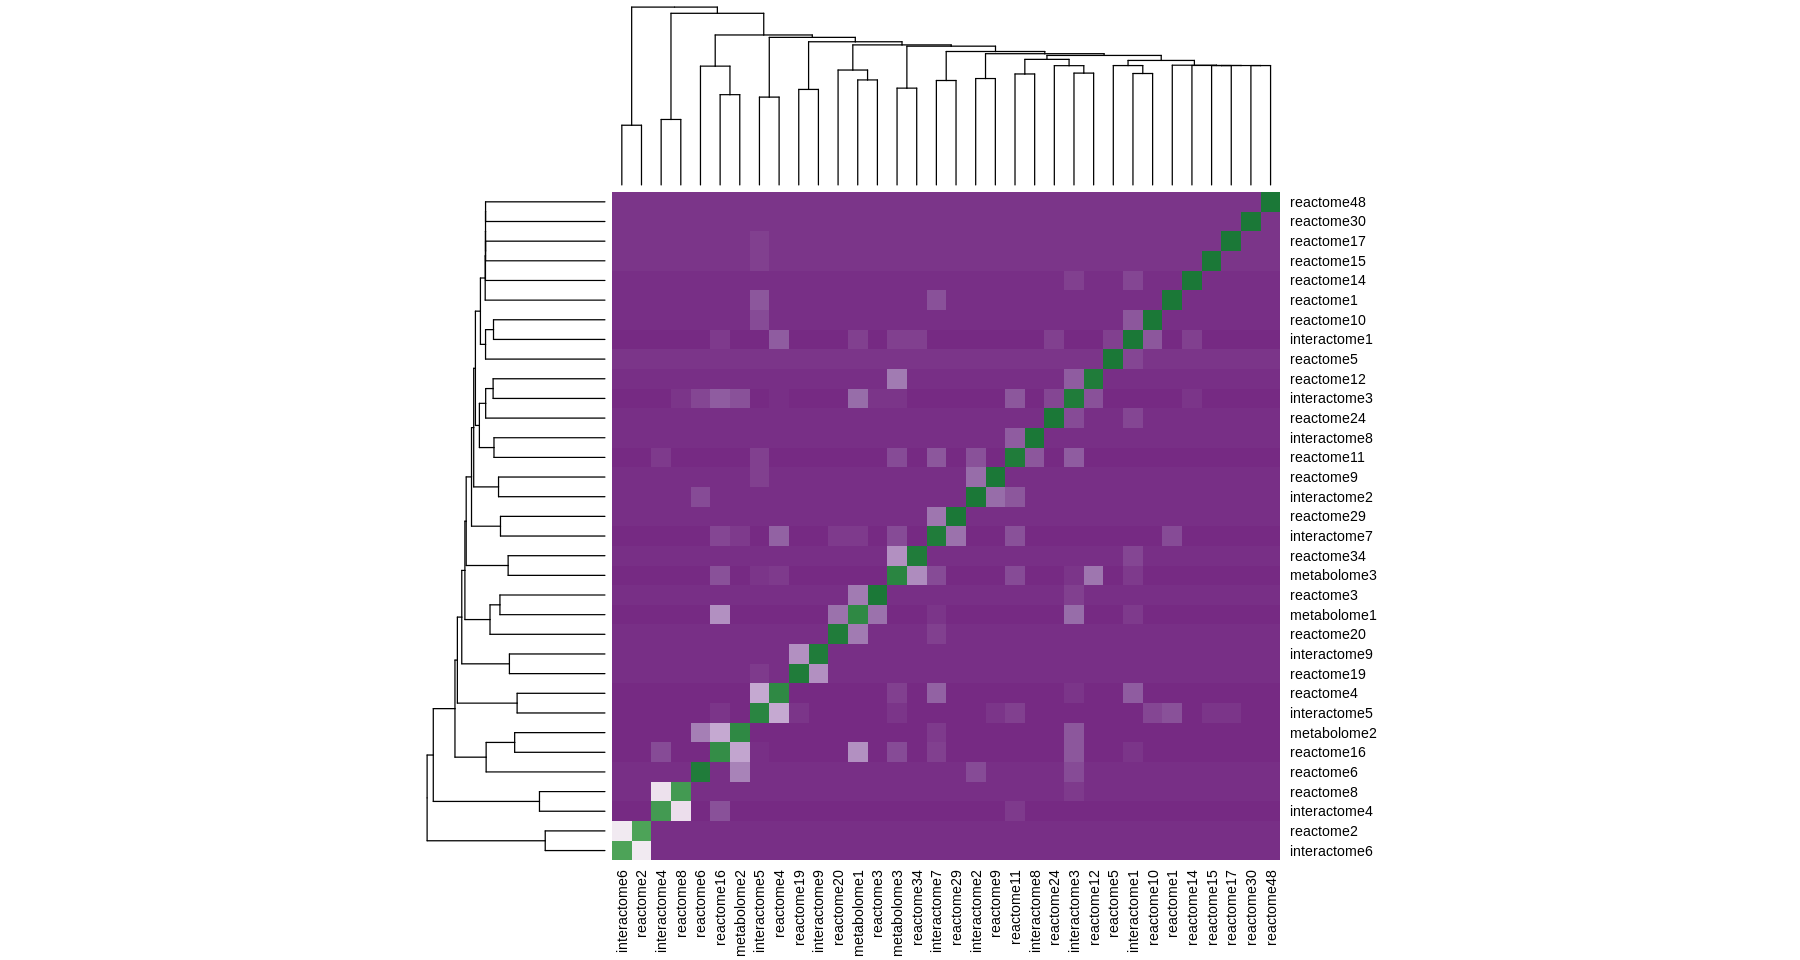

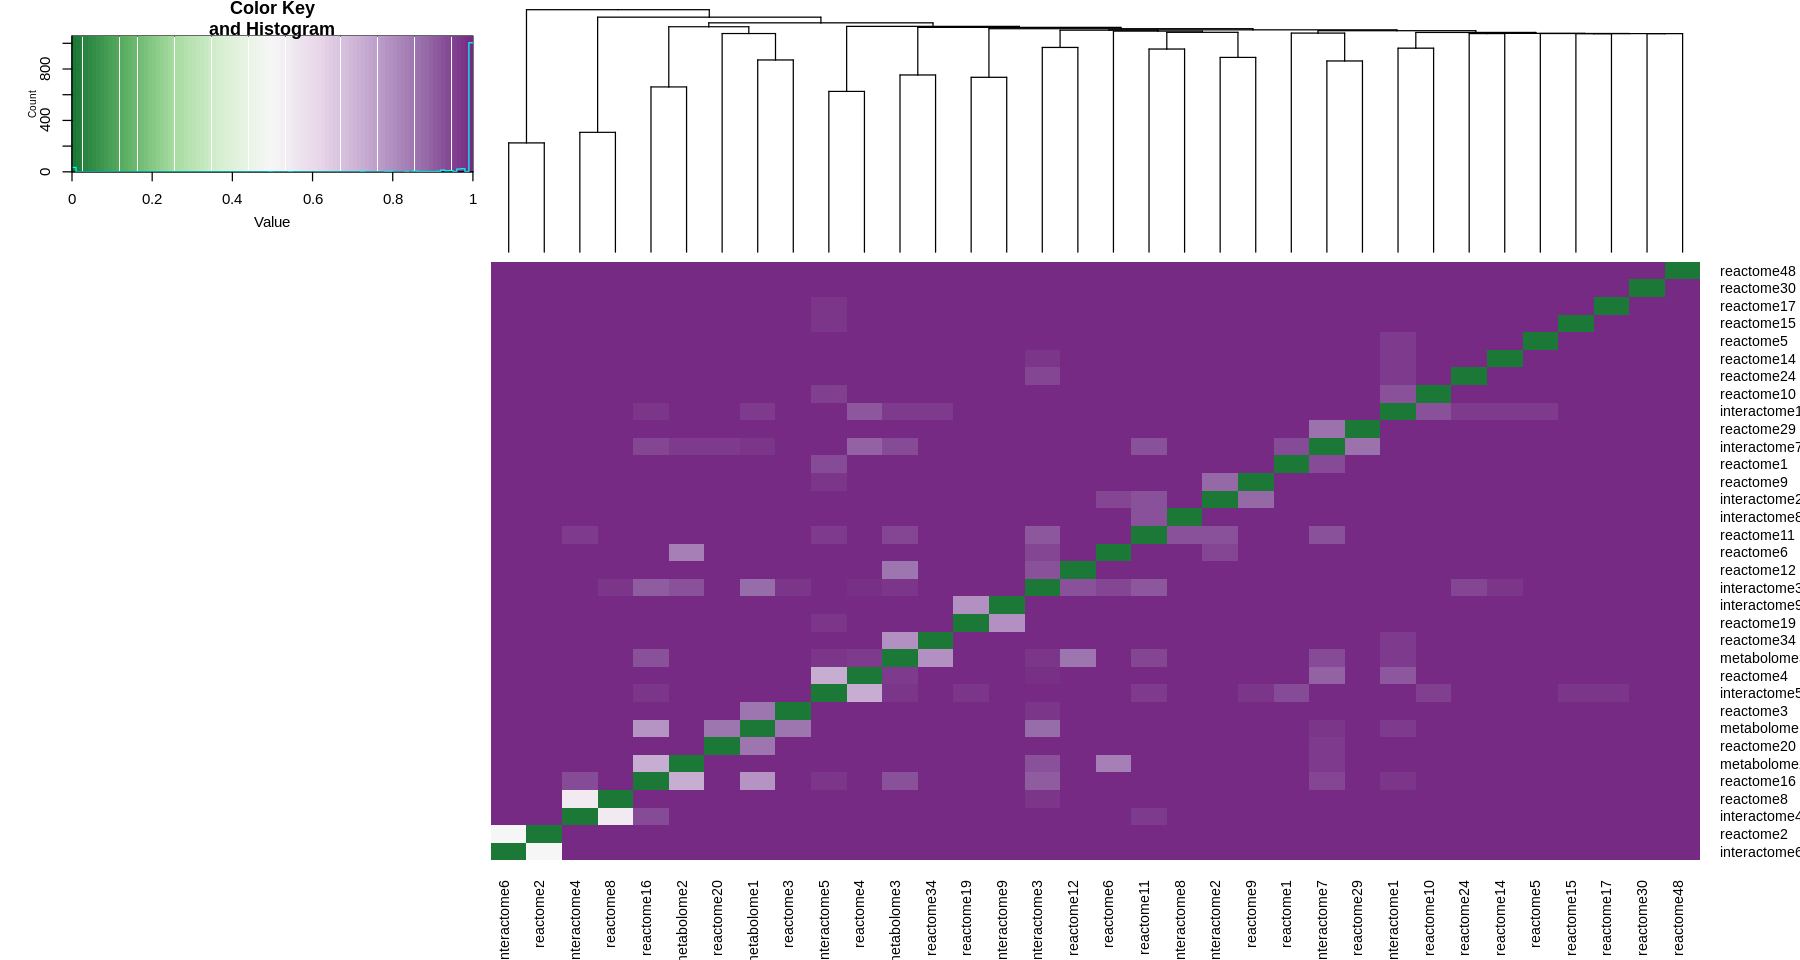

In [35]:
library(RColorBrewer)
options(repr.plot.width=15, repr.plot.height=8)
pal <- colorRampPalette(brewer.pal(9, "PRGn"))(100)[100:1]
funky <- function(x) {as.dendrogram(hclust(x,'ward.D2'))}
stats::heatmap(as.matrix(dist_mat),hclustfun = funky,col=pal)
heatmap.2(as.matrix(dist_mat),col= pal,dendrogram= "column",trace="none")

In [36]:
options(repr.plot.width=15, repr.plot.height=8)
pdf(paste0('Plots/Supplementary_Figure_4_',phenotype,'.pdf'))
pal <- colorRampPalette(brewer.pal(9, "PRGn"))(100)[100:1]
funky <- function(x) {as.dendrogram(hclust(x,'ward.D2'))}
stats::heatmap(as.matrix(dist_mat),hclustfun = funky,col=pal)
heatmap.2(as.matrix(dist_mat),col= pal,dendrogram= "column",trace="none")
dev.off()

png 
  2